# Depression Prediction

Author: Tong Su

Course Project, UC Irvine, Math 10, S22

## Introduction

As a psychology major student, I would like to use the dataset of depression importing from Kaggle to explore the socioeconomic factors that can predict the rate of rural residents being diagonosed as depression by using scikit learn. 

## Main portion of the project

(You can either have all one section or divide into multiple sections)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

### Basic info about the dataset

In [ ]:
df = pd.read_csv('b_depressed.csv')
df.head()

Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  1                  0                     1   
4                  0                  0                     0   

   incoming_agricultural  farm_expenses  labor_primary  lasting_investment  \
0               30028818       31363432              0            28411718   
1               30028818       31363432              0            28411718   
2               30028818       31363432              0            28411718   
3               22288055       18751329              0             7781123   
4               53384566       20731006              1            20100562   

   no_lasting_investmen  depressed  
0            28292707.0          0  
1            28292707.0          1  
2            28292707.0          0  
3            69219765.0          0  
4            43419447.0          0  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

Eliminate the null_values in "no_lasting_investmen" 

In [ ]:
df = df[~(df.no_lasting_investmen.isnull())]

Since the Survey_id and Ville_id are just the  not relevant with the mental disorder so drop them.

In [ ]:
df = df.drop(['Survey_id','Ville_id'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1409 non-null   int64  
 1   Age                    1409 non-null   int64  
 2   Married                1409 non-null   int64  
 3   Number_children        1409 non-null   int64  
 4   education_level        1409 non-null   int64  
 5   total_members          1409 non-null   int64  
 6   gained_asset           1409 non-null   int64  
 7   durable_asset          1409 non-null   int64  
 8   save_asset             1409 non-null   int64  
 9   living_expenses        1409 non-null   int64  
 10  other_expenses         1409 non-null   int64  
 11  incoming_salary        1409 non-null   int64  
 12  incoming_own_farm      1409 non-null   int64  
 13  incoming_business      1409 non-null   int64  
 14  incoming_no_business   1409 non-null   int64  
 15  inco

In [ ]:
df.describe()

sex          Age      Married  Number_children  \
count  1409.000000  1409.000000  1409.000000      1409.000000   
mean      0.918382    34.733854     0.774308         2.904897   
std       0.273879    13.800712     0.418186         1.872585   
min       0.000000    17.000000     0.000000         0.000000   
25%       1.000000    25.000000     1.000000         2.000000   
50%       1.000000    31.000000     1.000000         3.000000   
75%       1.000000    42.000000     1.000000         4.000000   
max       1.000000    91.000000     1.000000        11.000000   

       education_level  total_members  gained_asset  durable_asset  \
count      1409.000000    1409.000000  1.409000e+03   1.409000e+03   
mean          8.697658       4.996451  3.360588e+07   2.707096e+07   
std           2.913673       1.772778  2.007839e+07   1.804276e+07   
min           1.000000       1.000000  3.251120e+05   1.625560e+05   
25%           8.000000       4.000000  2.312976e+07   1.929852e+07   
50%           9.000000       5.000000  2.891220e+07   2.286194e+07   
75%          10.000000       6.000000  3.717283e+07   2.634528e+07   
max          19.000000      12.000000  9.912755e+07   9.961560e+07   

         save_asset  living_expenses  ...  incoming_salary  incoming_own_farm  \
count  1.409000e+03     1.409000e+03  ...      1409.000000        1409.000000   
mean   2.744453e+07     3.248661e+07  ...         0.176011           0.254081   
std    1.778911e+07     2.101274e+07  ...         0.380965           0.435498   
min    1.729660e+05     2.629190e+05  ...         0.000000           0.000000   
25%    2.339998e+07     2.103352e+07  ...         0.000000           0.000000   
50%    2.339998e+07     2.669228e+07  ...         0.000000           0.000000   
75%    2.339998e+07     3.870381e+07  ...         0.000000           1.000000   
max    9.992676e+07     9.929528e+07  ...         1.000000           1.000000   

       incoming_business  incoming_no_business  incoming_agricultural  \
count        1409.000000           1409.000000           1.409000e+03   
mean            0.109297              0.264017           3.457400e+07   
std             0.312123              0.440965           2.091860e+07   
min             0.000000              0.000000           3.251120e+05   
25%             0.000000              0.000000           2.295536e+07   
50%             0.000000              0.000000           3.002882e+07   
75%             0.000000              1.000000           4.003842e+07   
max             1.000000              1.000000           9.978910e+07   

       farm_expenses  labor_primary  lasting_investment  no_lasting_investmen  \
count   1.409000e+03    1409.000000        1.409000e+03          1.409000e+03   
mean    3.555012e+07       0.209368        3.300612e+07          3.360385e+07   
std     2.126744e+07       0.407002        2.114974e+07          2.160228e+07   
min     2.715050e+05       0.000000        7.429200e+04          1.263120e+05   
25%     2.239928e+07       0.000000        2.010056e+07          2.064203e+07   
50%     3.136343e+07       0.000000        2.841172e+07          2.829271e+07   
75%     4.399778e+07       0.000000        3.978445e+07          4.151762e+07   
max     9.965119e+07       1.000000        9.944667e+07          9.965119e+07   

         depressed  
count  1409.000000  
mean      0.166785  
std       0.372916  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

### Visualization 

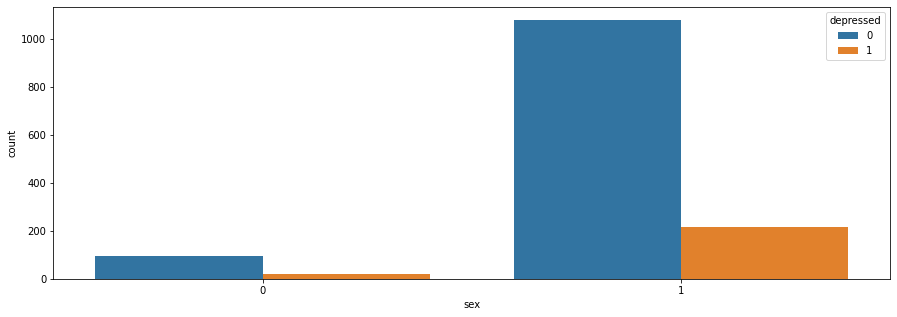

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='sex',hue='depressed',data=df)
plt.show()

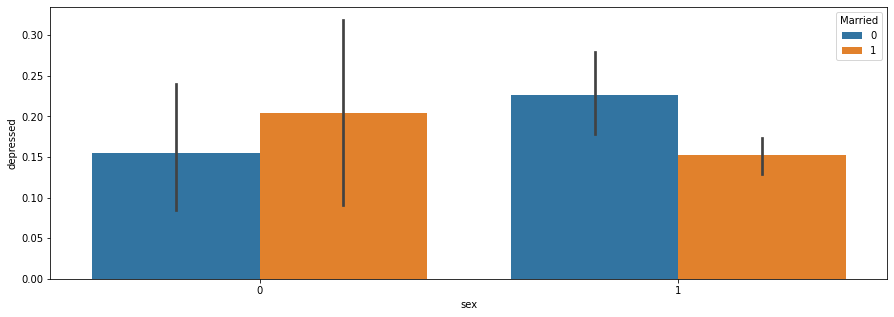

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex',y='depressed',hue='Married',data=df)
plt.show()

<AxesSubplot:xlabel='Number_children', ylabel='count'>

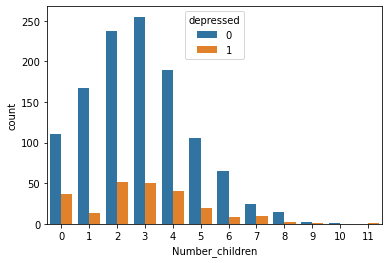

In [ ]:
sns.countplot(x='Number_children', hue='depressed', data=df)

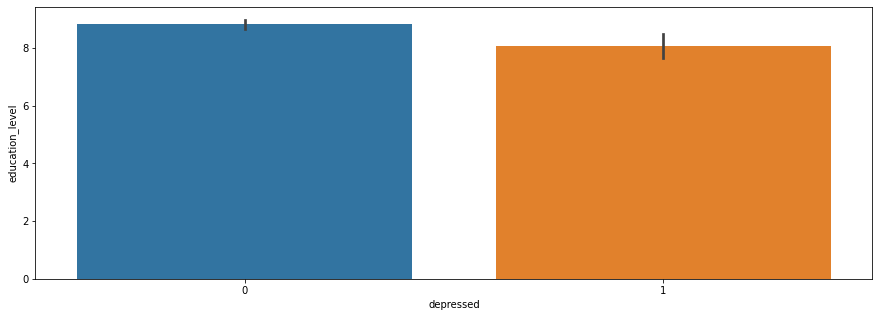

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='education_level',data=df)
plt.show()

In [ ]:
sel = alt.selection_single(fields=["depressed"])
c1= alt.Chart(df).mark_circle().encode(
    x="gained_asset",
    y="living_expenses",
    color=alt.Color('depressed')
)
c2= alt.Chart(df).mark_circle().encode(
    x="incoming_agricultural",
    y="lasting_investment",
    color=alt.Color('depressed')
)
c1&c2

alt.VConcatChart(...)

Based on graphs, we can basically have an intuition about the dataset. Indicated by the graph, unmarried men are more likely to be depressed than married men and married women are more likely to be depressed than unmarried women. The people not despressed distributes normarlly as the number of children they have and people do not have children are more likely to be depressed.

### Correlation 

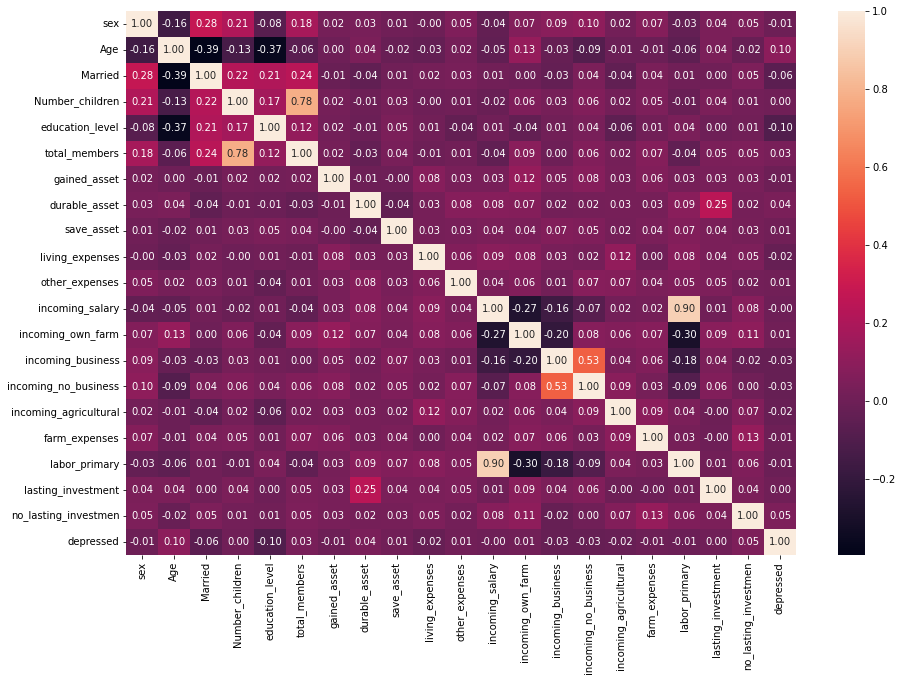

In [ ]:
plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

Here is the correlation matrix for all the predictor variables and response variable.
Notice that the correlation between labor_primary and incoming-salary is 0.90. This indicates that people with high incoming-salary  tend to also have high labor primary. 

### Train_Test_Split 

In [ ]:
socioecon_state = ['gained_asset','durable_asset', 'save_asset', 'living_expenses', 'other_expenses','incoming_agricultural', 'farm_expenses', 'lasting_investment']

In [ ]:
X = df[socioecon_state]
y = df['depressed']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
df['pred_depressed'] = pd.Series(clf.predict(X_test))

In [ ]:
log_loss(df['depressed'], clf.predict_proba(X))

0.7256651995634845

The log loss is not that high hence the model is proper for predicting depression.



In [ ]:
pred_depression_type = (df[['depressed', 'pred_depressed']]).copy()
pdt = pred_depression_type.value_counts(normalize=True)
pdt

depressed  pred_depressed
0          0.0               0.797101
1          0.0               0.184783
0          1.0               0.014493
1          1.0               0.003623
dtype: float64

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
clf1 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df[socioecon_state],df["depressed"])

DecisionTreeClassifier()

In [ ]:
clf1.score(df[socioecon_state],df["depressed"])

0.9460610361958836

In [ ]:
fig = plt.figure(figsize=(200,100))
_ = tree.plot_tree(clf1, 
                   feature_names=clf1.feature_names_in_
                   )

Restrict the maximum depth and maximum number of leaf nodes by instantiating a new classifier

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [ ]:
clf2.fit(df[socioecon_state],df["depressed"])

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [ ]:
clf2.score(df[socioecon_state],df["depressed"])

0.8523775727466288

In [ ]:
fig = plt.figure(figsize=(200,100))
_ = tree.plot_tree(clf2, 
                   feature_names=clf2.feature_names_in_
                   )

## Summary

In this project, I analyzed the datasets of rural residents' depression. First, I created graphs to describe the distribution of depression regarding different factors. Some factors such as marriage, sex influence the probability of being depressed a lot and others such as education level do not impact the probability of being depressed a lot. Then, I presented the correlation between factors. Then, I used machine learning to analyze the dataset fitting data to see whether the numerical variables can predict being depressed. The last part is to build up decision tree for predicting depression and restricting the range of tree by setting up the max leaf nodes and max depth.

## References

dataset source:
https://www.kaggle.com/datasets/francispython/b-depression

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6693b5c-6855-456a-83f0-b59aafb06404' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>